**Task 4**

In [ ]:
!pip install jiwer pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.7 MB/s eta 0:00:00


**Importing Libraries**

In [ ]:
import pandas as pd
from jiwer import wer

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving task4.csv to task4.csv


,segment_url_link,Human,Model H,Model i,Model k,Model l,Model m,Model n,Unnamed: 8
0,https://storage.googleapis.com/testing_audio_f...,वही अपना खेती बाड़ी और क्या,वही अपना खेती बाड़ी और क्या,वही अपना खेती बाड़ी और क्या,वही अपना खेती बाड़ी और क्या?,वही अपना खेती बाड़ी और क्या,वही अपना खेतीबाड़ी और क्या,वही अपना खेती बाड़ी और क्या,NaN
1,https://storage.googleapis.com/testing_audio_f...,मौनता का अर्थ क्या होता है,मौनता का अर्थ क्या होता है,मौनता का अर्थ क्या होता है?,मौन तागार थके होतई।,मोनता का अर्थ है क्या होता है,मोन ताका हर थक्या होताहए,मौनता का हर थका होता है,NaN
2,https://storage.googleapis.com/testing_audio_f...,और रक्षाबंधन पे चलो बहनों को,और रक्षाबंधन पे चलो बहनों को,और रक्षाबंधन पे चलो बहनों को --,और रक्षाबंधन पे चलो बहनों को?,और रक्षाबंधन पे चलो बहनों को,और रक्षा बंधन पे चलो बहनों को,और रक्षा बंधन पे चलो बहनों को,NaN
3,https://storage.googleapis.com/testing_audio_f...,एक सिंपल और सादा वे में,एक सिंपल और सादा वे में,एक सिंपल और सादा वे में।,एक सिंपल और सादा वे में?,एक सिंपल और सादावे में,एक सिंपल और सादा वे में,एक सिंपल और सादा वे में,NaN
4,https://storage.googleapis.com/testing_audio_f...,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना।,आने वाली चुनौतियों का इंतजार करना?,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना,आने वाली चुनौतियों का इंतजार करना,NaN


**Calculating WER for Each Model**

In [ ]:
models = ["Model H","Model i","Model k","Model l","Model m","Model n"]

results = {}

for model in models:
    total_wer = 0

    for i in range(len(df)):
        reference = str(df.loc[i,"Human"])
        hypothesis = str(df.loc[i,model])
        total_wer += wer(reference, hypothesis)

    avg_wer = total_wer / len(df)
    results[model] = avg_wer

results

{'Model H': 0.03977263534937402,
 'Model i': 0.07303633118329056,
 'Model k': 0.24426456838740365,
 'Model l': 0.11323879790317998,
 'Model m': 0.20730103077585332,
 'Model n': 0.11388090607047488}

**Converting WER to Accuracy %**

In [ ]:
accuracy = {}

for model, w in results.items():
    accuracy[model] = (1 - w) * 100

accuracy

{'Model H': 96.0227364650626,
 'Model i': 92.69636688167094,
 'Model k': 75.57354316125964,
 'Model l': 88.67612020968201,
 'Model m': 79.26989692241466,
 'Model n': 88.61190939295251}

**Ranking Model (Best To the  Worst)**

In [ ]:
ranking = sorted(accuracy.items(), key=lambda x: x[1], reverse=True)

print("MODEL RANKING (BEST → WORST)\n")
for rank, (model, acc) in enumerate(ranking,1):
    print(f"{rank}. {model} → {acc:.2f}% accuracy")

MODEL RANKING (BEST → WORST)

1. Model H → 96.02% accuracy
2. Model i → 92.70% accuracy
3. Model l → 88.68% accuracy
4. Model n → 88.61% accuracy
5. Model m → 79.27% accuracy
6. Model k → 75.57% accuracy


**Detail Comparison Table**

In [ ]:
summary = pd.DataFrame({
"Model": accuracy.keys(),
"WER": results.values(),
"Accuracy %": accuracy.values()
})

summary.sort_values("Accuracy %", ascending=False)

,Model,WER,Accuracy %
0,Model H,0.039773,96.022736
1,Model i,0.073036,92.696367
3,Model l,0.113239,88.676120
5,Model n,0.113881,88.611909
4,Model m,0.207301,79.269897
2,Model k,0.244265,75.573543


In [ ]:
summary.to_csv("ASR_Model_Evaluation.csv", index=False)
print("Saved successfully!")

Saved successfully!


**Visual Graph**

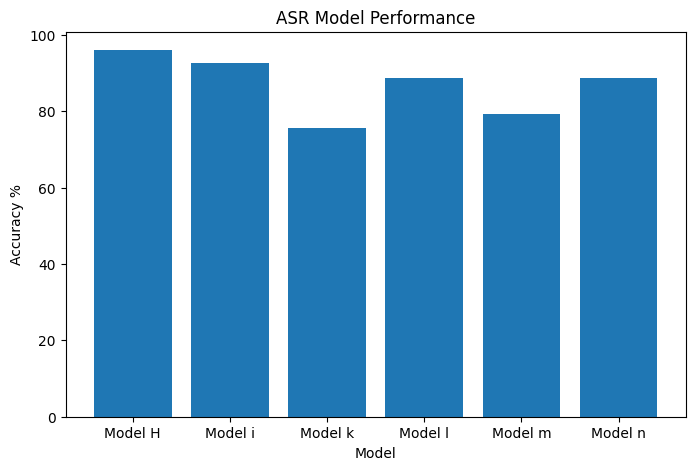

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(summary["Model"], summary["Accuracy %"])
plt.xlabel("Model")
plt.ylabel("Accuracy %")
plt.title("ASR Model Performance")
plt.show()

**Task 3**

In [ ]:
!pip install wordfreq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.1/183.1 kB 13.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from wordfreq import zipf_frequency

In [ ]:
df = pd.read_csv("/content/Task3.csv")   # change name if different

df.head()

,word
0,है
1,तो
2,में
3,जी
4,हैं


In [ ]:
def is_devanagari(word):
    return bool(re.fullmatch(r'[\u0900-\u097F]+', str(word)))

**Function to check spelling correctness**

In [ ]:
def check_spelling(word):

    word = str(word).strip()

    # Not in Devanagari → incorrect
    if not is_devanagari(word):
        return "incorrect spelling"

    # Frequency score (Hindi language usage)
    freq = zipf_frequency(word, "hi")

    # threshold can be adjusted
    if freq > 2.0:
        return "correct spelling"
    else:
        return "incorrect spelling"

**Apply classification**

In [ ]:
df["spelling_status"] = df["word"].apply(check_spelling)

**Count correct words**

In [ ]:
correct_count = (df["spelling_status"] == "correct spelling").sum()

print("Total unique correct spelled words:", correct_count)

Total unique correct spelled words: 25580


**Saveing result CSV**

In [ ]:
df.to_csv("hindi_word_spelling_classification.csv", index=False)

**Task 2**

In [ ]:
!pip install pandas requests pydub

In [ ]:
import pandas as pd
import requests
import json
from pydub import AudioSegment

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FT Data.csv to FT Data (1).csv


In [ ]:
df = pd.read_csv("/content/FT Data.csv")
df.head()

,user_id,recording_id,language,duration,rec_url_gcp,transcription_url_gcp,metadata_url_gcp
0,245746,825780,hi,443,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
1,291038,825727,hi,443,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
2,246004,988596,hi,475,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
3,93626,990175,hi,475,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
4,286851,526266,hi,522,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...


**Read disfluency CSV**

In [ ]:
dis_df = pd.read_csv("/content/Speech Disfluencies List.csv")
dis_df.head()

,Filled Pause,Repetition,False Start,Prolongation,Self-Correction
0,अं,मैं-मैं,जा—,अच्छ्छ्छा,कल—
1,अँ,वो-वो,कर—,हम्म्म,नहीं—
2,उम्,ये-ये,ले—,आाा,परसों—
3,NaN,जी-जी,कह—,अरे रे रे,माफ़—
4,हम्,उह उह,वो तो,अह,नहीं तो हां तो ये


**Converting the  table To single list of words**

In [ ]:
disfluency_words = []

for col in dis_df.columns:
    for word in dis_df[col].dropna():
        word = str(word).strip()
        if word != "":
            disfluency_words.append(word)

print("Total disfluency words:", len(disfluency_words))
print(disfluency_words[:20])

Total disfluency words: 214
['अं', 'अँ', 'उम्', 'हम्', 'हम्म', 'उम्म', 'अह', 'ओके', 'अ अ', 'ह ह ह', 'ज़', 'हुह', 'ओह', 'उह', 'हुं हुं', 'हह', 'आह', 'उ उ', 'अं', 'अँ']


In [ ]:
dataset = pd.read_csv("/content/FT Data (1).csv")
dataset.head()

,user_id,recording_id,language,duration,rec_url_gcp,transcription_url_gcp,metadata_url_gcp
0,245746,825780,hi,443,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
1,291038,825727,hi,443,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
2,246004,988596,hi,475,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
3,93626,990175,hi,475,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
4,286851,526266,hi,522,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...


In [ ]:
results = []

for index, row in dataset.iterrows():

    recording_id = str(row["recording_id"])
    transcription_url = row["transcription_url_gcp"]
    audio_url = row["rec_url_gcp"]

    print("Processing:", recording_id)

    # -------- download transcription --------
    tfile = f"{recording_id}.json"
    r = requests.get(transcription_url)
    open(tfile, "wb").write(r.content)

    # -------- read transcription safely --------
    with open(tfile, "r", encoding="utf-8") as f:
        data = json.load(f)

    # detect where segments exist
    if "segments" in data:
        segments = data["segments"]
    elif "results" in data:
        segments = data["results"]
    else:
        print("No segments found → skipping")
        continue

    # -------- download audio --------
    audio_file = f"{recording_id}.wav"
    r = requests.get(audio_url)
    open(audio_file, "wb").write(r.content)

    audio = AudioSegment.from_wav(audio_file)

    # -------- detect disfluency --------
    for i, seg in enumerate(segments):

        # get text safely
        text = seg.get("text", "")

        # get time safely
        start = seg.get("start", seg.get("start_time", 0))
        end = seg.get("end", seg.get("end_time", 0))

        for word in disfluency_words:
            if word in text:

                start_ms = int(start * 1000)
                end_ms = int(end * 1000)

                clip = audio[start_ms:end_ms]
                clip_name = f"{recording_id}_clip_{i}.wav"
                clip.export(clip_name, format="wav")

                results.append([
                    recording_id,
                    clip_name,
                    text
                ])
                break

Processing: 825780


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Converting results to table

In [ ]:
out = pd.DataFrame(results, columns=[
    "recording_id",
    "clip_file",
    "transcription"
])

out.head()

,recording_id,clip_file,transcription


**Task 1**

In [40]:
!pip install transformers datasets evaluate jiwer accelerate librosa soundfile pandas requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 64.8 MB/s eta 0:00:00


In [41]:
import pandas as pd
import requests
import json
import librosa
import torch

from datasets import Dataset, Audio
from transformers import WhisperProcessor, WhisperForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer
import evaluate

In [42]:
from google.colab import files
uploaded = files.upload()

Saving FT Data.csv to FT Data (2).csv


In [44]:
df = pd.read_csv("/content/FT Data.csv")
df.head()

,user_id,recording_id,language,duration,rec_url_gcp,transcription_url_gcp,metadata_url_gcp
0,245746,825780,hi,443,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
1,291038,825727,hi,443,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
2,246004,988596,hi,475,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
3,93626,990175,hi,475,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...
4,286851,526266,hi,522,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...,https://storage.googleapis.com/joshtalks-data-...


**Download audio + transcription and prepare training data**

In [45]:
records = []

for _, row in df.iterrows():

    rid = row["recording_id"]

    # download audio
    audio_file = f"{rid}.wav"
    r = requests.get(row["rec_url_gcp"])
    open(audio_file, "wb").write(r.content)

    # download transcription
    tfile = f"{rid}.json"
    r = requests.get(row["transcription_url_gcp"])
    open(tfile, "wb").write(r.content)

    # read transcription text
    with open(tfile, "r", encoding="utf-8") as f:
        data = json.load(f)

    # combine segment texts
    text = " ".join([seg["text"] for seg in data["segments"]])

    records.append({
        "audio": audio_file,
        "sentence": text
    })

print("Total samples:", len(records))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

**Convert to HuggingFace dataset**

In [46]:
dataset = Dataset.from_list(records)
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))
dataset

Dataset({
    features: ['audio'],
    num_rows: 0
})

**Load The Wishper Small  Model**

In [47]:
processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="hi", task="transcribe")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/479 [00:00<?, ?it/s]

generation_config.json: 0.00B [00:00, ?B/s]

**Preprocess the Audio And Text**

In [48]:
def prepare(example):
    audio = example["audio"]

    example["input_features"] = processor(
        audio["array"],
        sampling_rate=16000
    ).input_features[0]

    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

dataset = dataset.map(prepare)

**Train and Split**

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

**Training Setting the Wishper Model**

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="whisper-hi",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=10,
    save_steps=50,
    evaluation_strategy="steps",
    predict_with_generate=True,
    fp16=torch.cuda.is_available()
)

**Defining Trainer**

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=processor.feature_extractor
)

**Fine Tuning Wishper Small Model**

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=processor.feature_extractor
)

In [ ]:
from datasets import load_dataset
fleurs = load_dataset("google/fleurs", "hi_in", split="test")

**Evaluating the Base Line Model**

In [ ]:
wer_metric = evaluate.load("wer")

def transcribe(model, audio):
    inputs = processor(audio["array"], sampling_rate=16000, return_tensors="pt")
    with torch.no_grad():
        pred_ids = model.generate(inputs.input_features)
    return processor.batch_decode(pred_ids, skip_special_tokens=True)[0]

**Evaluating the Finetuned Model**

In [ ]:
wer_metric = evaluate.load("wer")

def transcribe(model, audio):
    inputs = processor(audio["array"], sampling_rate=16000, return_tensors="pt")
    with torch.no_grad():
        pred_ids = model.generate(inputs.input_features)
    return processor.batch_decode(pred_ids, skip_special_tokens=True)[0]

**Saving WER into CSV Foramt**

In [ ]:
preds = []
refs = []

for sample in fleurs.select(range(50)):
    preds.append(transcribe(model, sample["audio"]))
    refs.append(sample["transcription"])

finetuned_wer = wer_metric.compute(predictions=preds, references=refs)
print("Fine-tuned WER:", finetuned_wer)